In [2]:
# load tool

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

%matplotlib inline

C:\Users\Student\AppData\Local\Temp\ipykernel_56064\612371142.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# import SVM model
SVM = SVC()
SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [3]:
# model evalutions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

In [4]:
df_1 = pd.read_csv("apple_quality.csv")

In [5]:
df_1

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [6]:
df_1= df_1.replace(to_replace="good", value = 1)

In [7]:
df_1=df_1.replace(to_replace="bad", value = 0)

C:\Users\Student\AppData\Local\Temp\ipykernel_56064\3158947988.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1=df_1.replace(to_replace="bad", value = 0)


In [8]:
df_1

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,1.0


In [9]:
df_1=df_1.drop(4000)

In [10]:
# split data into X and y
X_1 = df_1.drop("Quality",axis=1)
y_1= df_1["Quality"]

* split into training and testing

In [11]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X_1,y_1,test_size=0.2)

In [12]:
SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [13]:
degree = range(1,15,1)
train_scores=[]
test_scores=[]
# loop through layers
for i in degree:
    SVM.set_params(degree=i, max_iter=100000000,kernel='poly')
    SVM.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(SVM.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(SVM.score(X1_test,y1_test))
    

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [14]:
train_scores

[0.501875,
 0.5034375,
 0.5015625,
 0.5015625,
 0.5015625,
 0.5134375,
 0.54625,
 0.575625,
 0.5915625,
 0.5653125,
 0.56625,
 0.5678125,
 0.59125,
 0.5571875]

In [15]:
test_scores

[0.4925,
 0.495,
 0.49875,
 0.49875,
 0.49875,
 0.5125,
 0.5475,
 0.5775,
 0.59,
 0.5625,
 0.5625,
 0.56625,
 0.5825,
 0.55625]

Max poly SVM score on the test data: 59.00%


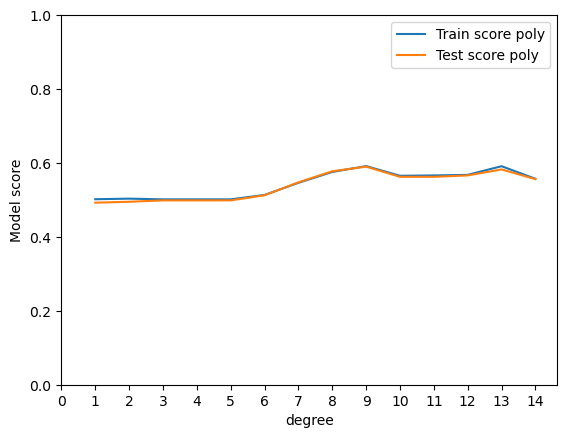

In [16]:
plt.plot(degree, train_scores, label="Train score poly")
plt.plot(degree, test_scores, label="Test score poly")
plt.ylim(0,1)
plt.xticks(np.arange(0,15))
plt.xlabel("degree")
plt.ylabel("Model score")
plt.legend()

print(f"Max poly SVM score on the test data: {max(test_scores)*100:.2f}%")
# poly

In [17]:

f1_train_scores_poly=[]
f1_test_scores_poly=[]

for i in degree:
    SVM.set_params(degree=i, max_iter=10000,kernel='poly')
    SVM.fit(X1_train,y1_train)
    y1_train_pred = SVM.predict(X1_train)
    y1_test_pred = SVM.predict(X1_test)
    # update the training scores list
    f1_train_scores_poly.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_poly.append(f1_score(y1_test,y1_test_pred))
    
    

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


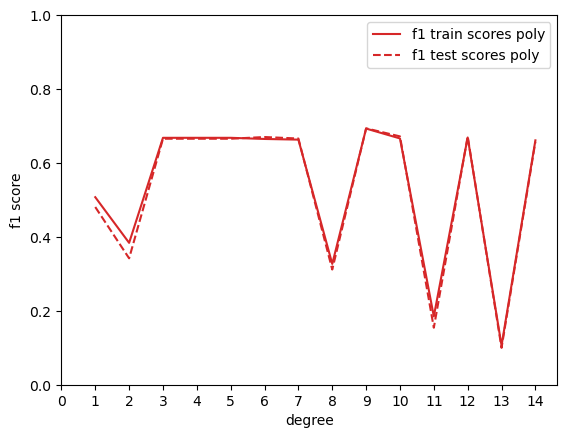

In [18]:
plt.plot(degree, f1_train_scores_poly, label="f1 train scores poly",color='C3',)
plt.plot(degree, f1_test_scores_poly, label="f1 test scores poly",color='C3', linestyle='--',)

plt.xticks(np.arange(0,15))
plt.ylim(0,1)
plt.xlabel("degree")
plt.ylabel("f1 score")
plt.legend()



C:\Users\Student\AppData\Local\Temp\ipykernel_56064\152722450.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1=df_1.replace(to_replace="bad", value = 0)
C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


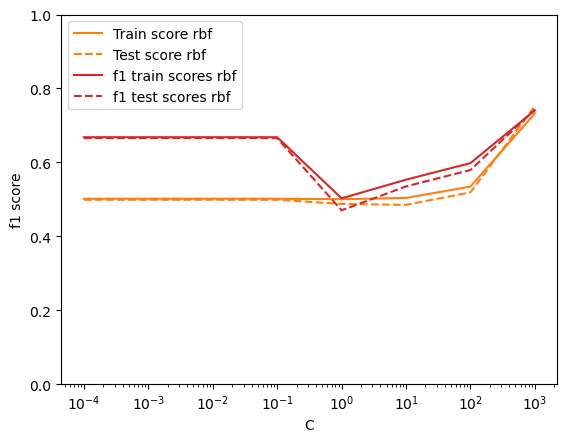

In [20]:
import matplotlib.pyplot as plt

df_1 = pd.read_csv("apple_quality.csv")

df_1= df_1.replace(to_replace="good", value = 1)
df_1=df_1.replace(to_replace="bad", value = 0)

df_1=df_1.drop(4000)



# split data into X and y
X_1 = df_1.drop("Quality",axis=1)
y_1= df_1["Quality"]

np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X_1,y_1,test_size=0.2)


C = [1e-4, 1e-3, 1e-2, 1e-1,1,10,100, 1000]
train_scores=[]
test_scores=[]
# loop through layers
for i in C:
    SVM.set_params(C=i, max_iter=100000000,kernel='rbf')
    SVM.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(SVM.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(SVM.score(X1_test,y1_test))

plt.semilogx(C, train_scores, label="Train score rbf",color='C1',)
plt.semilogx(C, test_scores, label="Test score rbf",color='C1',linestyle='--',)
plt.ylim(0,1)
## plt.xticks(np.arange(0,10))
plt.xlabel("C")
plt.ylabel("Model score")
plt.legend()


## print(f"Max rbf SVM score on the test data: {max(test_scores)*100:.2f}%")


f1_train_scores_rbf=[]
f1_test_scores_rbf=[]

for i in C:
    SVM.set_params(C=i, max_iter=10000,kernel='rbf')
    SVM.fit(X1_train,y1_train)
    y1_train_pred = SVM.predict(X1_train)
    y1_test_pred = SVM.predict(X1_test)
    # update the training scores list
    f1_train_scores_rbf.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_rbf.append(f1_score(y1_test,y1_test_pred))

plt.semilogx(C, f1_train_scores_rbf, label="f1 train scores rbf",color='C3',)
plt.semilogx(C, f1_test_scores_rbf, label="f1 test scores rbf",color='C3', linestyle='--',)

# plt.xticks(np.arange(0,10))
plt.ylim(0,1)
plt.xlabel("C")
plt.ylabel("f1 score")
plt.legend()

    

In [21]:
params_grid = {
    'kernel': ['linear','rbf', 'sigmoid'],
    'C': [0.1,1,10,100],
    'gamma':[1,10,100,1000],
    'max_iter':[500000],
}

In [22]:
grid_search = GridSearchCV(
    estimator=SVM,
    param_grid=params_grid,
    return_train_score=True,
    cv=4,
    verbose=5,
)

In [23]:
grid_search.fit(X1_train,y1_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=0.1, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.604, test=0.614) total time=   4.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=0.1, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.564, test=0.575) total time=   4.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=0.1, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.580, test=0.571) total time=   4.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=0.1, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.593, test=0.583) total time=   5.1s
[CV 1/4] END C=0.1, gamma=1, kernel=rbf, max_iter=500000;, score=(train=0.501, test=0.502) total time=   0.9s
[CV 2/4] END C=0.1, gamma=1, kernel=rbf, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.8s
[CV 3/4] END C=0.1, gamma=1, kernel=rbf, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.8s
[CV 4/4] END C=0.1, gamma=1, kernel=rbf, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.9s
[CV 1/4] END C=0.1, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.501, test=0.502) total time=   0.3s
[CV 2/4] END C=0.1, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.3s
[CV 3/4] END C=0.1, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.3s
[CV 4/4] END C=0.1, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.501) total time

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=0.1, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.604, test=0.614) total time=   4.6s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=0.1, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.564, test=0.575) total time=   4.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=0.1, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.580, test=0.571) total time=   4.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=0.1, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.593, test=0.583) total time=   4.8s
[CV 1/4] END C=0.1, gamma=10, kernel=rbf, max_iter=500000;, score=(train=0.501, test=0.502) total time=   1.0s
[CV 2/4] END C=0.1, gamma=10, kernel=rbf, max_iter=500000;, score=(train=0.502, test=0.501) total time=   1.0s
[CV 3/4] END C=0.1, gamma=10, kernel=rbf, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.8s
[CV 4/4] END C=0.1, gamma=10, kernel=rbf, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.9s
[CV 1/4] END C=0.1, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.501, test=0.502) total time=   0.3s
[CV 2/4] END C=0.1, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.3s
[CV 3/4] END C=0.1, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.2s
[CV 4/4] END C=0.1, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.501) t

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=0.1, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.604, test=0.614) total time=   4.4s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=0.1, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.564, test=0.575) total time=   3.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=0.1, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.580, test=0.571) total time=   3.9s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=0.1, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.593, test=0.583) total time=   4.8s
[CV 1/4] END C=0.1, gamma=100, kernel=rbf, max_iter=500000;, score=(train=0.501, test=0.502) total time=   0.9s
[CV 2/4] END C=0.1, gamma=100, kernel=rbf, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.9s
[CV 3/4] END C=0.1, gamma=100, kernel=rbf, max_iter=500000;, score=(train=0.502, test=0.501) total time=   1.1s
[CV 4/4] END C=0.1, gamma=100, kernel=rbf, max_iter=500000;, score=(train=0.502, test=0.501) total time=   1.0s
[CV 1/4] END C=0.1, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.501, test=0.502) total time=   0.2s
[CV 2/4] END C=0.1, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.2s
[CV 3/4] END C=0.1, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.2s
[CV 4/4] END C=0.1, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=0.1, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.604, test=0.614) total time=   4.7s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=0.1, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.564, test=0.575) total time=   4.6s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=0.1, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.580, test=0.571) total time=   4.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=0.1, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.593, test=0.583) total time=   4.1s
[CV 1/4] END C=0.1, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=0.501, test=0.502) total time=   0.8s
[CV 2/4] END C=0.1, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.9s
[CV 3/4] END C=0.1, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=0.502, test=0.501) total time=   1.0s
[CV 4/4] END C=0.1, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.9s
[CV 1/4] END C=0.1, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.501, test=0.502) total time=   0.2s
[CV 2/4] END C=0.1, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.2s
[CV 3/4] END C=0.1, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.2s
[CV 4/4] END C=0.1, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=1, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.498, test=0.496) total time=   4.6s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=1, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.518, test=0.525) total time=   4.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=1, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.541, test=0.537) total time=   4.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=1, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.544, test=0.530) total time=   4.2s
[CV 1/4] END C=1, gamma=1, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.502) total time=   1.1s
[CV 2/4] END C=1, gamma=1, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.497) total time=   0.9s
[CV 3/4] END C=1, gamma=1, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.502) total time=   0.9s
[CV 4/4] END C=1, gamma=1, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.504) total time=   0.8s
[CV 1/4] END C=1, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.501, test=0.502) total time=   0.3s
[CV 2/4] END C=1, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.525, test=0.546) total time=   0.1s
[CV 3/4] END C=1, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.534, test=0.521) total time=   0.1s
[CV 4/4] END C=1, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.527, test=0.540) total time=   0.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=1, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.498, test=0.496) total time=   4.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=1, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.518, test=0.525) total time=   4.6s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=1, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.541, test=0.537) total time=   4.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=1, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.544, test=0.530) total time=   4.6s
[CV 1/4] END C=1, gamma=10, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.502) total time=   1.0s
[CV 2/4] END C=1, gamma=10, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.9s
[CV 3/4] END C=1, gamma=10, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.8s
[CV 4/4] END C=1, gamma=10, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.8s
[CV 1/4] END C=1, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.501, test=0.502) total time=   0.2s
[CV 2/4] END C=1, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 3/4] END C=1, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.501) total time=   0.2s
[CV 4/4] END C=1, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.527, test=0.540) total time=   0.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=1, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.498, test=0.496) total time=   4.9s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=1, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.518, test=0.525) total time=   5.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=1, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.541, test=0.537) total time=   5.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=1, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.544, test=0.530) total time=   4.3s
[CV 1/4] END C=1, gamma=100, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.502) total time=   0.8s
[CV 2/4] END C=1, gamma=100, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   1.1s
[CV 3/4] END C=1, gamma=100, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.9s
[CV 4/4] END C=1, gamma=100, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   1.0s
[CV 1/4] END C=1, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 2/4] END C=1, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.3s
[CV 3/4] END C=1, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 4/4] END C=1, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.527, test=0.540) total time

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=1, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.498, test=0.496) total time=   5.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=1, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.518, test=0.525) total time=   4.7s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=1, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.541, test=0.537) total time=   5.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=1, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.544, test=0.530) total time=   4.4s
[CV 1/4] END C=1, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.502) total time=   1.1s
[CV 2/4] END C=1, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.9s
[CV 3/4] END C=1, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.9s
[CV 4/4] END C=1, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.8s
[CV 1/4] END C=1, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 2/4] END C=1, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 3/4] END C=1, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 4/4] END C=1, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.527, test=0.540) t

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=10, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.515, test=0.515) total time=   3.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=10, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.525, test=0.507) total time=   4.5s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=10, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.544, test=0.531) total time=   3.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=10, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.520, test=0.546) total time=   3.9s
[CV 1/4] END C=10, gamma=1, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.504) total time=   0.9s
[CV 2/4] END C=10, gamma=1, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.497) total time=   0.8s
[CV 3/4] END C=10, gamma=1, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.504) total time=   0.8s
[CV 4/4] END C=10, gamma=1, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.505) total time=   0.9s
[CV 1/4] END C=10, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 2/4] END C=10, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.525, test=0.539) total time=   0.0s
[CV 3/4] END C=10, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.531, test=0.525) total time=   0.1s
[CV 4/4] END C=10, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.521, test=0.551) total time=   0.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=10, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.515, test=0.515) total time=   4.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=10, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.525, test=0.507) total time=   4.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=10, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.544, test=0.531) total time=   3.9s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=10, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.520, test=0.546) total time=   3.7s
[CV 1/4] END C=10, gamma=10, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.502) total time=   0.8s
[CV 2/4] END C=10, gamma=10, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.8s
[CV 3/4] END C=10, gamma=10, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.9s
[CV 4/4] END C=10, gamma=10, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.9s
[CV 1/4] END C=10, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 2/4] END C=10, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 3/4] END C=10, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 4/4] END C=10, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.527, test=0.541) total time

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=10, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.515, test=0.515) total time=   3.9s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=10, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.525, test=0.507) total time=   4.6s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=10, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.544, test=0.531) total time=   4.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=10, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.520, test=0.546) total time=   3.6s
[CV 1/4] END C=10, gamma=100, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.502) total time=   0.8s
[CV 2/4] END C=10, gamma=100, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.8s
[CV 3/4] END C=10, gamma=100, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.7s
[CV 4/4] END C=10, gamma=100, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.9s
[CV 1/4] END C=10, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 2/4] END C=10, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 3/4] END C=10, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 4/4] END C=10, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.527, test=0.540) t

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=10, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.515, test=0.515) total time=   3.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=10, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.525, test=0.507) total time=   4.5s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=10, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.544, test=0.531) total time=   3.9s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=10, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.520, test=0.546) total time=   4.3s
[CV 1/4] END C=10, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.502) total time=   0.8s
[CV 2/4] END C=10, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.8s
[CV 3/4] END C=10, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.8s
[CV 4/4] END C=10, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.8s
[CV 1/4] END C=10, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 2/4] END C=10, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 3/4] END C=10, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 4/4] END C=10, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.527, test

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=100, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.556, test=0.544) total time=   4.1s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=100, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.524, test=0.504) total time=   3.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=100, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.504, test=0.520) total time=   4.4s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=100, gamma=1, kernel=linear, max_iter=500000;, score=(train=0.514, test=0.517) total time=   5.4s
[CV 1/4] END C=100, gamma=1, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.504) total time=   0.9s
[CV 2/4] END C=100, gamma=1, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.497) total time=   0.9s
[CV 3/4] END C=100, gamma=1, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.504) total time=   1.0s
[CV 4/4] END C=100, gamma=1, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.505) total time=   0.8s
[CV 1/4] END C=100, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 2/4] END C=100, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.525, test=0.540) total time=   0.0s
[CV 3/4] END C=100, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.531, test=0.522) total time=   0.0s
[CV 4/4] END C=100, gamma=1, kernel=sigmoid, max_iter=500000;, score=(train=0.521, test=0.552) total time

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=100, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.556, test=0.544) total time=   4.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=100, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.524, test=0.504) total time=   4.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=100, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.504, test=0.520) total time=   4.5s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=100, gamma=10, kernel=linear, max_iter=500000;, score=(train=0.514, test=0.517) total time=   4.1s
[CV 1/4] END C=100, gamma=10, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.502) total time=   0.8s
[CV 2/4] END C=100, gamma=10, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.8s
[CV 3/4] END C=100, gamma=10, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.9s
[CV 4/4] END C=100, gamma=10, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.8s
[CV 1/4] END C=100, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 2/4] END C=100, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 3/4] END C=100, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 4/4] END C=100, gamma=10, kernel=sigmoid, max_iter=500000;, score=(train=0.526, test=0.541) t

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=100, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.556, test=0.544) total time=   4.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=100, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.524, test=0.504) total time=   3.8s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=100, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.504, test=0.520) total time=   4.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=100, gamma=100, kernel=linear, max_iter=500000;, score=(train=0.514, test=0.517) total time=   4.2s
[CV 1/4] END C=100, gamma=100, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.502) total time=   0.9s
[CV 2/4] END C=100, gamma=100, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.8s
[CV 3/4] END C=100, gamma=100, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.9s
[CV 4/4] END C=100, gamma=100, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.8s
[CV 1/4] END C=100, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 2/4] END C=100, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 3/4] END C=100, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.3s
[CV 4/4] END C=100, gamma=100, kernel=sigmoid, max_iter=500000;, score=(train=0.527, test

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END C=100, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.556, test=0.544) total time=   4.2s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END C=100, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.524, test=0.504) total time=   4.0s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END C=100, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.504, test=0.520) total time=   4.3s


C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END C=100, gamma=1000, kernel=linear, max_iter=500000;, score=(train=0.514, test=0.517) total time=   4.3s
[CV 1/4] END C=100, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.502) total time=   0.8s
[CV 2/4] END C=100, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.8s
[CV 3/4] END C=100, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.8s
[CV 4/4] END C=100, gamma=1000, kernel=rbf, max_iter=500000;, score=(train=1.000, test=0.501) total time=   0.9s
[CV 1/4] END C=100, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.3s
[CV 2/4] END C=100, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 3/4] END C=100, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.502, test=0.502) total time=   0.2s
[CV 4/4] END C=100, gamma=1000, kernel=sigmoid, max_iter=500000;, score=(train=0.

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=4, estimator=SVC(C=1000, degree=14, max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 10, 100, 1000],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'max_iter': [500000]},
             return_train_score=True, verbose=5)

In [24]:
res = grid_search.cv_results_


In [25]:
res

{'mean_fit_time': array([4.46780115, 0.60518956, 0.30362457, 4.51947778, 0.62968242,
        0.27685452, 4.28370982, 0.66696519, 0.27343637, 4.4559325 ,
        0.59261513, 0.22510731, 4.55851299, 0.63841903, 0.18837845,
        4.75558376, 0.585886  , 0.18783343, 4.89660156, 0.64618784,
        0.20663327, 4.87906337, 0.60669774, 0.2029801 , 4.06718296,
        0.58618033, 0.13932329, 4.00268412, 0.5968501 , 0.20793003,
        4.16249686, 0.57821614, 0.22037166, 4.20290411, 0.56082886,
        0.19438887, 4.49526411, 0.62328482, 0.13404667, 4.48448789,
        0.54792422, 0.1960066 , 4.17248744, 0.58820373, 0.22706306,
        4.286744  , 0.56958258, 0.20868677]),
 'std_fit_time': array([0.39972278, 0.03437528, 0.02718335, 0.24529199, 0.04644606,
        0.02194327, 0.38687477, 0.03460837, 0.03392429, 0.26119117,
        0.06593251, 0.01516947, 0.21265188, 0.05994059, 0.07246316,
        0.09735218, 0.0219013 , 0.03802064, 0.33135512, 0.07052088,
        0.06326892, 0.28310236, 0.047

In [26]:
grid_search.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'max_iter': 500000}

In [27]:
grid_search.score(X1_test,y1_test)

0.61375

In [28]:
grid_search.score(X1_train,y1_train)
model=grid_search.best_estimator_

In [29]:
from sklearn.model_selection import learning_curve, validation_curve

In [30]:
SVM_best = SVC(C=0.11, gamma=1, kernel='linear', max_iter=50000000)

In [31]:
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator=SVM_best,
        X=X1_train,
        y=y1_train,
        train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1 ],
        return_times = True 
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fit_time_mean = np.mean(fit_times, axis=1)
fit_time_std = np.std(fit_times, axis=1)
score_time_mean = np.mean(score_times, axis=1)
score_time_std = np.std(score_times, axis=1)

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

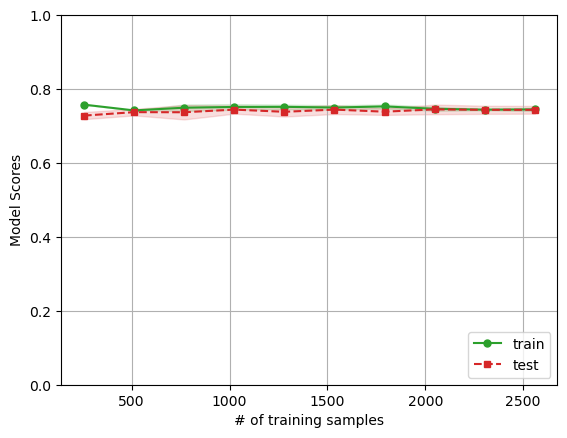

In [32]:
plt.plot(train_sizes, train_mean,
             color='C2', marker='o',
             markersize=5, label='train')

plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='C2')

plt.plot(train_sizes, test_mean,
             color='C3', linestyle='--',
             marker='s', markersize=5,
             label='test')

plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='C3')
plt.grid()
plt.ylim(0,1)
plt.xlabel('# of training samples')
plt.ylabel('Model Scores')
plt.legend(loc='lower right')
plt.show()

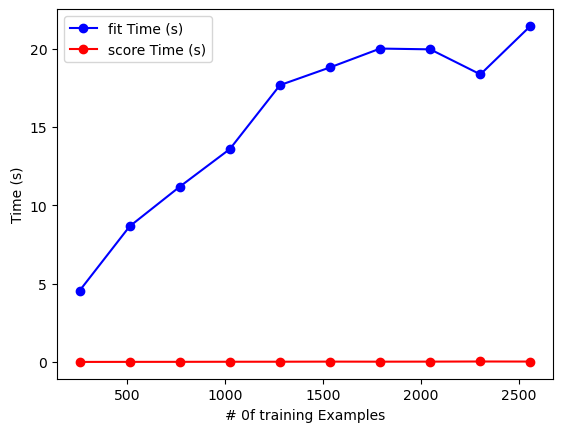

In [33]:
plt.figure()
# plt.title("Modeling Time: "+ title)
plt.xlabel("# 0f training Examples")
plt.ylabel("Time (s)")
plt.plot(train_sizes, fit_time_mean, 'o-', color="b", label="fit Time (s)")
plt.plot(train_sizes, score_time_mean, 'o-', color="r", label="score Time (s)")
plt.legend(loc="best")
plt.show()